# Unsupervised Learning on Country Data

**Clustering the Countries by using Unsupervised Learning for HELP International
Objective:**
To categorize the countries using socio-economic and health factors that determine the overall development of the country.

**About organization:**
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

**Problem Statement:**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorize the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Data Information

| Column Name    | Description                                                                                                 |
|----------------|-------------------------------------------------------------------------------------------------------------|
| **country**    | Name of the country.                                                                                         |
| **child_mort** | Death of children under 5 years of age per 1000 live births. (Metric: Mortality rate per 1000 live births)   |
| **exports**    | Exports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to exports) |
| **health**     | Total health spending per capita. Given as %age of GDP per capita. (Metric: Percentage of GDP per capita spent on healthcare) |
| **imports**    | Imports of goods and services per capita. Given as %age of the GDP per capita. (Metric: Percentage of GDP per capita attributed to imports) |
| **income**     | Net income per person. (Metric: Income per capita, Net)                                                      |
| **inflation**  | The measurement of the annual growth rate of the Total GDP. (Metric: Annual growth rate of the country's GDP) |
| **life_expec** | The average number of years a new born child would live if the current mortality patterns remain the same. (Metric: Life expectancy at birth) |
| **total_fer**  | The number of children that would be born to each woman if the current age-fertility rates remain the same. (Metric: Total fertility rate, children per woman) |
| **gdpp**       | The GDP per capita. Calculated as the Total GDP divided by the total population. (Metric: Gross Domestic Product per capita) |






### I. Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



### II. Import Data

In [41]:
df = pd.read_csv('../data/raw/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [42]:
dd = pd.read_csv('../data/data-dictionary.csv')
dd.head()

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...


In [43]:
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset shape: 167 rows, 10 columns


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [45]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### III. Exploratory Data Analysis

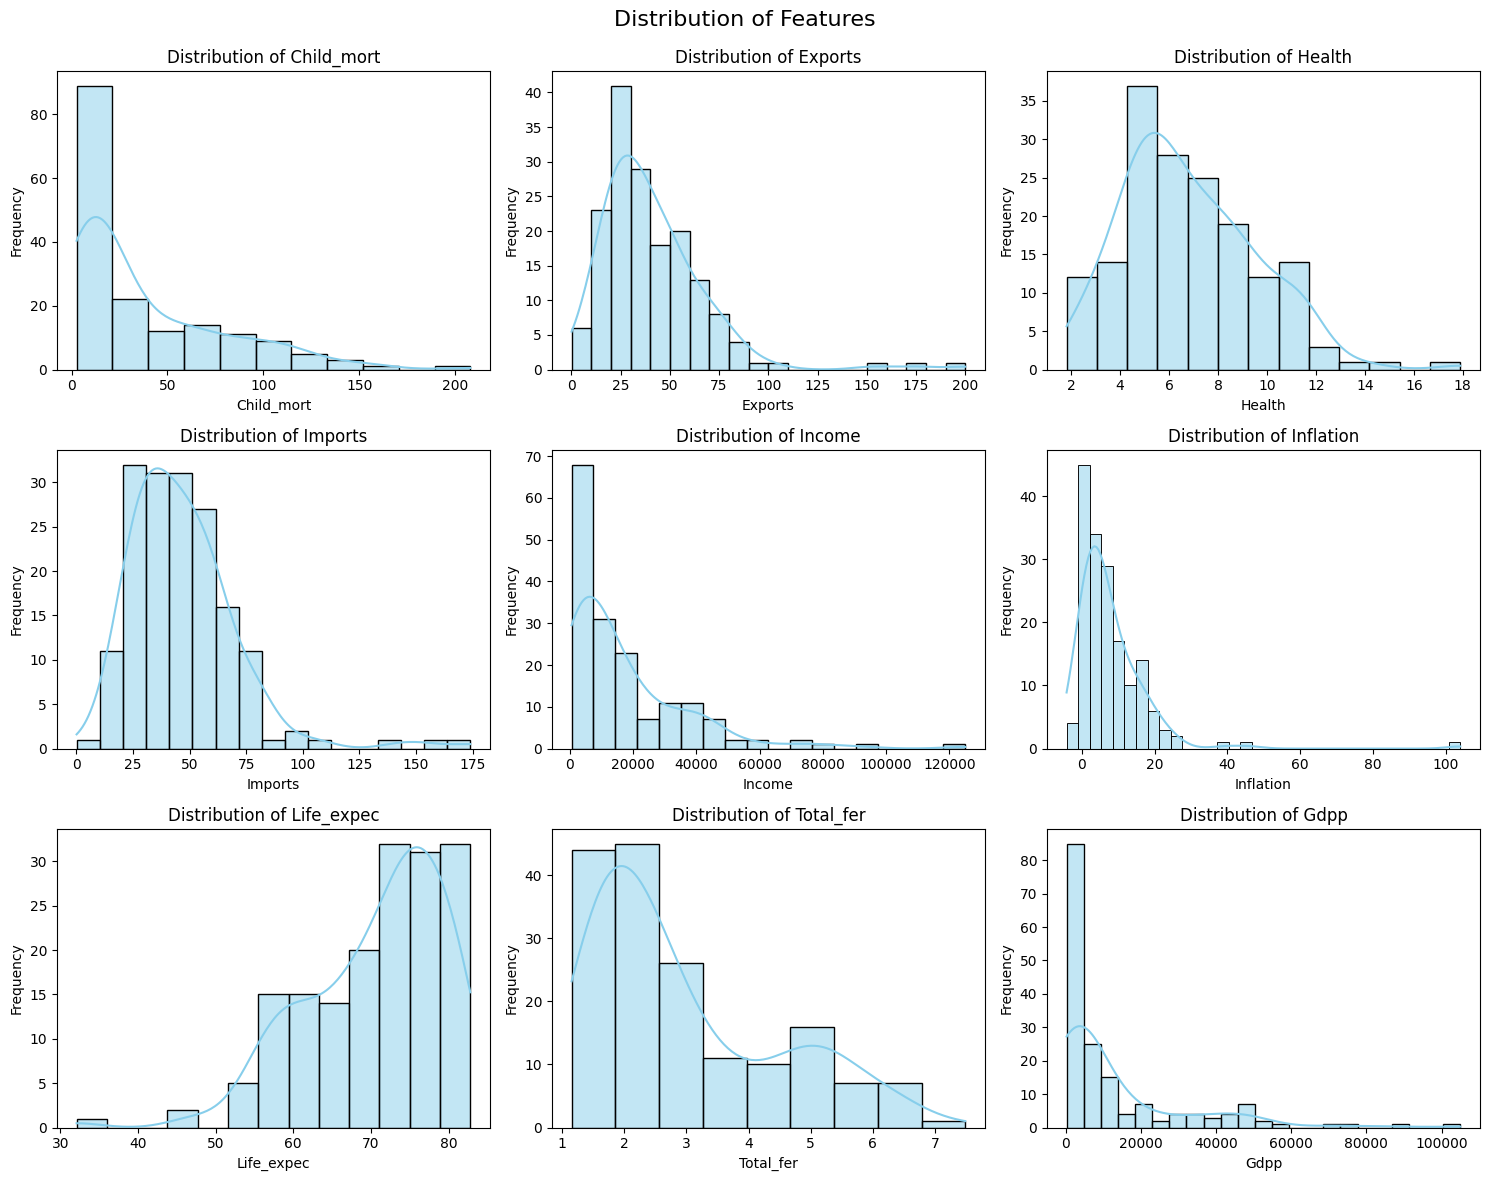

In [46]:
# Plotting the distribution of each feature
import math

features = df.columns[1:]
n_features = len(features)

# Dynamically calculate grid size
rows = math.ceil(n_features / 3)  # 3 columns per row
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature's distribution
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col.capitalize()}', fontsize=12)
    axes[i].set_xlabel(col.capitalize(), fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Distribution of Features', fontsize=16)
plt.show()


#### IV. Data Processing

In [47]:
df.shape

(167, 10)

In [48]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [49]:
# Extracting features
features = df.columns[1:]

In [50]:
# Applying Standard Scaler to the features
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### V. Model Training

In [51]:
X = df[features] # scaled data
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


##### KMeans Model

In [52]:
# # Finding the optimal number of clusters using the Elbow Method
# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow graph
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.title('Elbow Method')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Inertia')
# plt.show()

# # Train K-Means with the optimal number of clusters
# optimal_k = 3  # Choose based on the elbow graph
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# kmeans_labels = kmeans.fit_predict(X)

# # Add cluster labels to the original dataframe
# df['KMeans_Cluster'] = kmeans_labels


##### Hierarchical Clustering

In [53]:
# from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# # Perform hierarchical clustering
# linkage_matrix = linkage(X, method='ward')  # 'ward' minimizes variance within clusters

# # Plot the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(linkage_matrix)
# plt.title('Dendrogram')
# plt.xlabel('Samples')
# plt.ylabel('Euclidean Distance')
# plt.show()

# # Assign clusters based on dendrogram
# hierarchical_labels = fcluster(linkage_matrix, t=3, criterion='maxclust')  # t=3 clusters
# df['Hierarchical_Cluster'] = hierarchical_labels


##### DBScan

In [54]:
# from sklearn.cluster import DBSCAN

# # Train DBSCAN model
# dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune these parameters
# dbscan_labels = dbscan.fit_predict(X)

# # Add cluster labels to the original dataframe
# df['DBSCAN_Cluster'] = dbscan_labels

# # Visualize DBSCAN results
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=dbscan_labels, cmap='viridis', s=50)
# plt.title('DBSCAN Clustering Results')
# plt.xlabel('Feature 1 (Scaled)')
# plt.ylabel('Feature 2 (Scaled)')
# plt.show()


#### VI. Hyperparameter Tuning

#### VII. Model Evaluation

In [55]:
# # Analyze countries in the most vulnerable cluster (e.g., Cluster 0 in KMeans)
# vulnerable_countries = df[df['KMeans_Cluster'] == 0]['country']
# print("Countries in dire need of aid:")
# print(vulnerable_countries)
